In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pdb import set_trace as st
from scipy.linalg import inv
from scipy import stats
from scipy.integrate import quad
from scipy.stats import multivariate_normal,rv_continuous,norm
from tqdm import tqdm
import torch
from typing import Callable
import sys
from pathlib import Path

project_root = Path().resolve().parent
sys.path.append(str(project_root))

from utils.sampling import *
from utils.LGCP import * 

Generate data points using custom function.
The code is optimized for data points between 0 and 1, but any other range can be normalized with a linear transformation:
x' = (x-x_min)/(x_max-x_min)


Fitted Parameters are a = 0.0, b = 1.8314621586797277


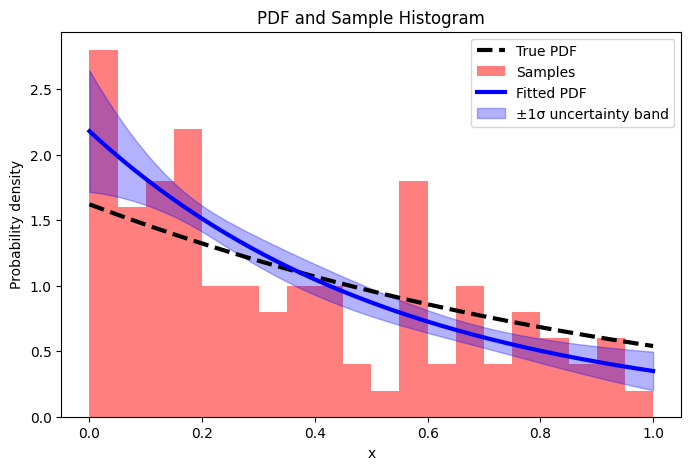

In [2]:

true_pdf = lambda x, a, b: np.exp(-a*x**2 - b*x) ### 
n_samples = 100
PARAMS = [0.1,1]
seed = 1

function_model = CustomPDFModel(true_pdf,PARAMS,n_samples,seed) 

samples = function_model.sample() # Samples n_samples from true_pdf
fitted_params = function_model.fit([1,1]) # Fit the samples to the true_pdf with some initial guess
print(f'Fitted Parameters are a = {fitted_params[0]}, b = {fitted_params[1]}')
ref_fit,ref_unc = function_model.plot(bins = 20) # Plot results

Step 0: Marginal = 370.7703, length = 0.9914, var = 1.0051
Step 10: Marginal = 370.9269, length = 0.9092, var = 1.0618
Step 20: Marginal = 371.0017, length = 0.8532, var = 1.1431
Step 30: Marginal = 371.0442, length = 0.8489, var = 1.2422
Step 40: Marginal = 371.0806, length = 0.8640, var = 1.3410
Step 50: Marginal = 371.1107, length = 0.8717, var = 1.4407
Step 60: Marginal = 371.1341, length = 0.8741, var = 1.5406
Step 70: Marginal = 371.1513, length = 0.8750, var = 1.6406
Step 80: Marginal = 371.1632, length = 0.8755, var = 1.7406
Step 90: Marginal = 371.1710, length = 0.8754, var = 1.8406
Step 99: Marginal = 371.1750, length = 0.8752, var = 1.9306


100%|█████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 769.65it/s]


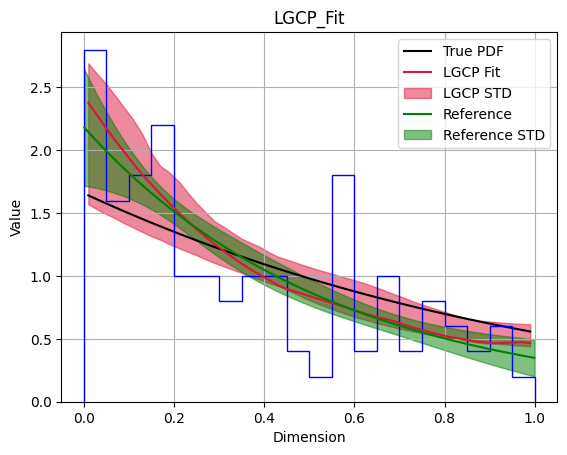

In [4]:
model = Model(samples,optimizing_points = 50,length_scale = 1,var_scale = 1)
model.grad_optimize_hyperparameters(steps = 100,lr = 0.01)
model.grad_fit()
model.plot_median(true_pdf(model.x,*PARAMS),ref_fit,ref_unc)
